In [7]:
from functools import partial
from fvhoe.initial_conditions import square
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt

In [4]:
solver = EulerSolver(
    w0=square(dims="xyz", vx=1, vy=1, vz=1),
    nx=32,
    ny=32,
    nz=32,
    px=3,
    py=3,
    pz=3,
    cupy=True,
)
solver.run(n=100)

100%|██████████| 100/100 [00:06<00:00, 15.72it/s]


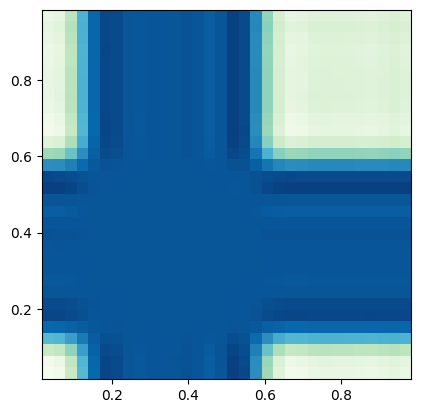

In [10]:
fig, ax = plt.subplots()

solver.plot_2d_slice(ax, param="rho", z=0.75)

In [10]:
from fvhoe.array_management import get_array_slice as slc
import numpy as np

solver_main = EulerSolver(
    w0=square(dims="xy", vx=1, vy=1),
    nx=32,
    ny=32,
    px=3,
    py=3,
)
solver_main.run(
    T=1.0,
    snapshot_dir="/scratch/gpfs/jp7427/fvhoe/snapshots/square_timing_test_N=512_p=3_main",
)

solver_index = EulerSolver(
    w0=square(dims="xy", vx=1, vy=1),
    nx=32,
    ny=32,
    px=3,
    py=3,
)
solver_index.run(
    T=1.0,
    snapshot_dir="/scratch/gpfs/jp7427/fvhoe/snapshots/square_timing_test_N=512_p=3_index",
)

Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/square_timing_test_N=512_p=3_main
Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/square_timing_test_N=512_p=3_index


In [11]:
np.mean(
    np.abs(
        solver_main.snapshots[-1]["w"][slc("rho")]
        - solver_index.snapshots[-1]["w"][slc("rho")]
    )
)

NamedArray(0.)